In [638]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## task1

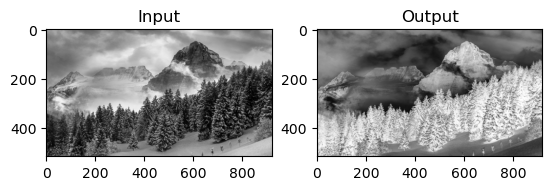

In [641]:
# Intensity inversion

img = cv2.imread('Task1.jpg')
inverted_img = 255 - img

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Input")

plt.subplot(1, 2, 2)
plt.imshow(inverted_img)
plt.title("Output")

plt.show()

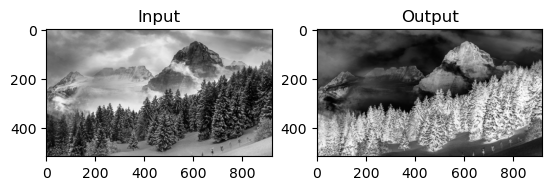

In [642]:
# Gamma correction

def gamma_correction(img, gamma=1.0):
    gamma_img = np.power(img / 255.0, gamma) * 255.0
    return gamma_img.astype(np.uint8)
    
dark_img = gamma_correction(inverted_img, gamma=1.5)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Input")

plt.subplot(1, 2, 2)
plt.imshow(dark_img)
plt.title("Output")

plt.show()

## task2

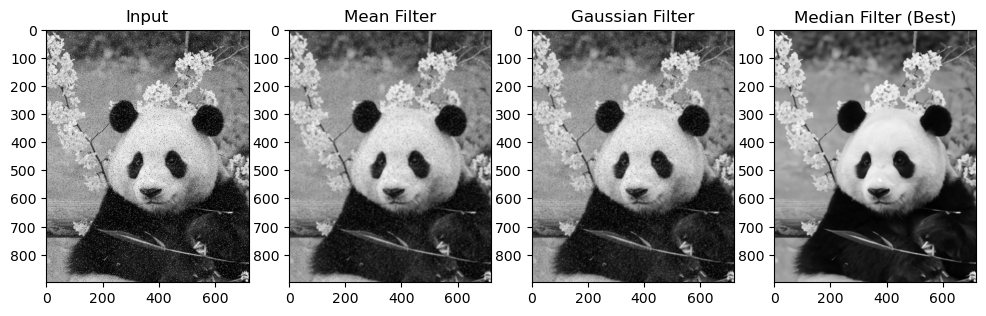

In [646]:
img2 = cv2.imread('Task2.jpg')

# Mean Filter
mean_filtered = cv2.blur(img2, (5, 5))  

# Gaussian Filter
gaussian_filtered = cv2.GaussianBlur(img2, (5, 5), 1.5) 

# Median Filter
median_filtered = cv2.medianBlur(img2, 5) 

# Result
plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.imshow(img2)
plt.title("Input")

plt.subplot(1, 4, 2)
plt.imshow(mean_filtered)
plt.title("Mean Filter")

plt.subplot(1, 4, 3)
plt.imshow(gaussian_filtered)
plt.title("Gaussian Filter")

plt.subplot(1, 4, 4)
plt.imshow(median_filtered)
plt.title("Median Filter (Best)")

plt.show()

Median filtering is most effective in dealing with salt and pepper noise because it  eliminates isolated intensity spikes with the median value of local pixels while preserving edge details（Week 2 Part 1 PPT）.

## task 3

In [650]:
ddepth = cv2.CV_16S
kernel_size = 5
window_name = "Laplace Demo"

In [652]:
img3 = cv2.imread('Task3.jpg')

In [654]:
# Unsharp Masking
gaussian_blur = cv2.GaussianBlur(img3, (5, 5), 1.5)
unsharp_mask = cv2.addWeighted(img3, 2.6, gaussian_blur, -1.5, 0)

In [656]:
# Laplacian Filter
gaussian_blur2 = cv2.GaussianBlur(img3, (3, 3), 0.5) 
laplacian = cv2.Laplacian(gaussian_blur2, cv2.CV_64F) 
laplacian = np.uint8(np.clip(img3 - laplacian, 1.5, 255))

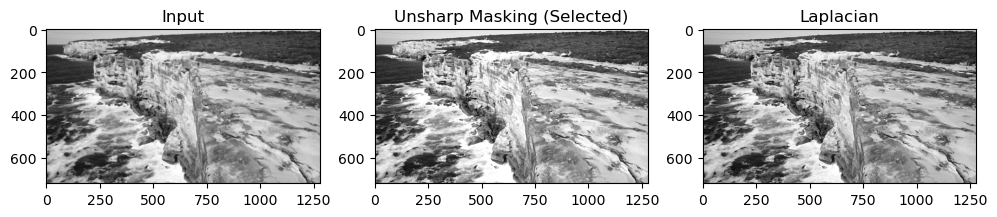

In [658]:
# Result
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img3)
plt.title("Input")

plt.subplot(1, 3, 2)
plt.imshow(unsharp_mask)
plt.title("Unsharp Masking (Selected)")

plt.subplot(1, 3, 3)
plt.imshow(laplacian, cmap="gray")
plt.title("Laplacian")

plt.show()

Unsharp masking is better becauese the goal is to enhance overall image sharpness while preserving edges. It works by subtracting a blurred version of the image from the original, emphasizing high-frequency details (PPT Week2 Part1 p26). However, the Laplacian filter is a second-order derivative filter that highlights edges by detecting areas of rapid intensity change (PPT Week2 Part1 p37). It is better suited for edge detection rather than general sharpening.